<a href="https://colab.research.google.com/github/anandusateeshNSUT/Hand-Sign-Recognition-CNN/blob/main/ISL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **For downloading the dataset from Kaggle**

In [1]:
!pip install opendatasets
import opendatasets as od

## **Downloading the Dataset to the root directory**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
dataset_url = "https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset"
od.download(dataset_url)

Skipping, found downloaded files in ".\aslamerican-sign-language-aplhabet-dataset" (use force=True to force download)


In [3]:
from os import listdir

In [4]:
total_signs=sorted(listdir("aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train"))
print(total_signs)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [5]:
!pip install keras

In [6]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import Adam

from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

In [7]:
dir1 = "aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train"
root_dir = listdir(dir1)
image_list, label_list = [], []
print(root_dir)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Resizing Each image and appending them to an Image list and their directory name to the label list

In [9]:
for directory in root_dir:
    i=0
    for files in listdir(f"{dir1}/{directory}"):
        image_path = f"{dir1}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((50,50))
        image = img_to_array(image)
        image_list.append(image)
        i+=1
        label_list.append(directory)
        if i>3000:
          break
        

In [10]:
# Visualize the number of classes count
print(directory)
label_counts = pd.DataFrame(label_list).value_counts()
sorted(label_counts)

Z


[2262,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002,
 6002]

In [11]:
num_classes = len(label_counts)
num_classes

26

## **Splitting the lists as 80% Train and 20% Test**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [14]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 50,50,3)
x_test = x_test.reshape( -1, 50,50,3)

In [15]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

## **Creating a CNN model and printing the model summary**

In [19]:
import tensorflow as tf

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(50,50,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Flatten())

model.add(Dense(40, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

## Training the model

In [20]:
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(monitor='val-loss', patience=3)
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs =5,validation_data=(x_val,y_val),callbacks=[early_stopping])
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

Epoch 1/5
3047/3047 [==============================] - 187s 61ms/step - loss: 1.1201 - accuracy: 0.6551 - val_loss: 0.3789 - val_accuracy: 0.8828
Epoch 2/5
3047/3047 [==============================] - 168s 55ms/step - loss: 0.2322 - accuracy: 0.9309 - val_loss: 0.1860 - val_accuracy: 0.9437
Epoch 3/5
3047/3047 [==============================] - 174s 57ms/step - loss: 0.1362 - accuracy: 0.9586 - val_loss: 0.1323 - val_accuracy: 0.9611
Epoch 4/5
3047/3047 [==============================] - 173s 57ms/step - loss: 0.0976 - accuracy: 0.9701 - val_loss: 0.1000 - val_accuracy: 0.9734
Epoch 5/5
3047/3047 [==============================] - 182s 60ms/step - loss: 0.0754 - accuracy: 0.9772 - val_loss: 0.0825 - val_accuracy: 0.9770


## **Plotting the accuracy-epoch graph while training**

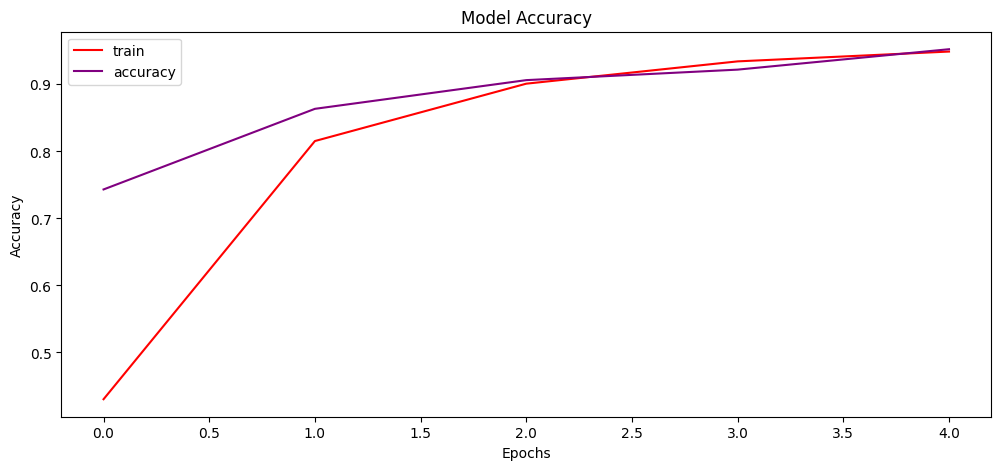

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='purple')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'accuracy'])
plt.show()

## **Plotting the loss-epoch graph while training**

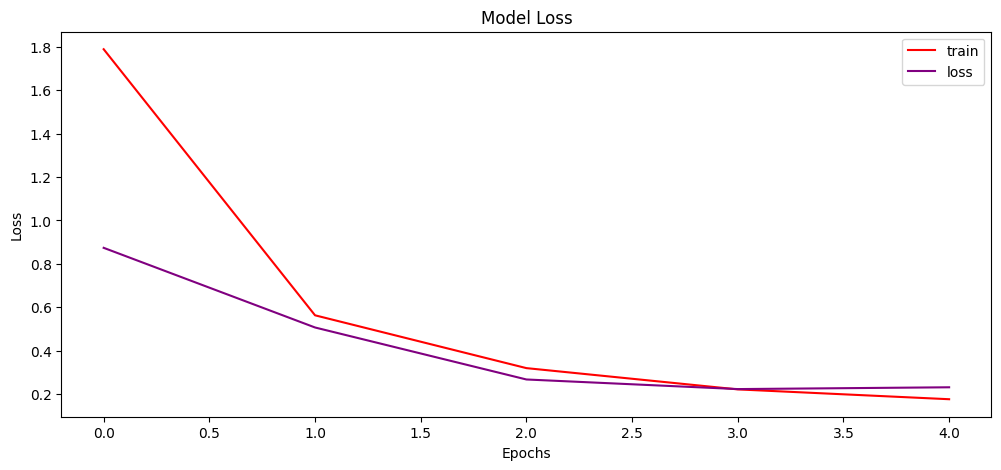

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='purple')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'loss'])
plt.show()

## **Accuracy of the model on the test set**

In [22]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

476/476 [==============================] - 8s 16ms/step - loss: 0.2437 - accuracy: 0.9297
Test Accuracy: 92.96875


In [19]:
import os
labels = sorted([folder for folder in os.listdir('aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/') if not folder.startswith('.')])

In [20]:
with open('labels.txt', 'w') as file:
    for label in labels:
      file.write(label)
      file.write('\n')

In [21]:
f = open("labels.txt",'r')
f.readlines()

['asl_alphabet_test\n', 'asl_alphabet_train\n']

## **Saving the model**

In [22]:
model.save("ihsr")

INFO:tensorflow:Assets written to: ihsr\assets


INFO:tensorflow:Assets written to: ihsr\assets


## **Importing a random image from the local directory to evaluate the model.**

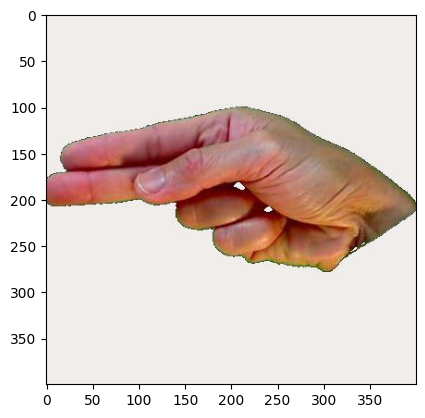

In [27]:
image = Image.open('aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train\H\h_4_rotate_7.jpeg')
plt.imshow(image)


In [28]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import numpy as np
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax
import os
import h5py


## **Testing the model on the above imported image**

In [29]:
shape = ((50,50,3))
model = tf.keras.Sequential([hub.KerasLayer(model,input_shape=shape)])
test_image = image.resize((50,50))
test_image = preprocessing.image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis =0)
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
predictions = model.predict(test_image)
scores = tf.nn.softmax(predictions[0])
scores = scores.numpy()
image_class = class_names[np.argmax(scores)]
print(image_class)

1/1 [==============================] - 0s 152ms/step
P
